In [11]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from constants import *

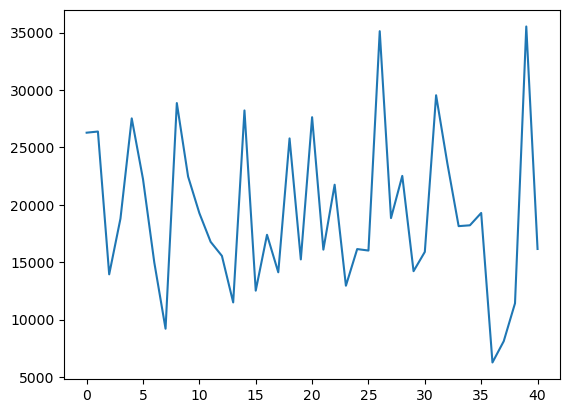

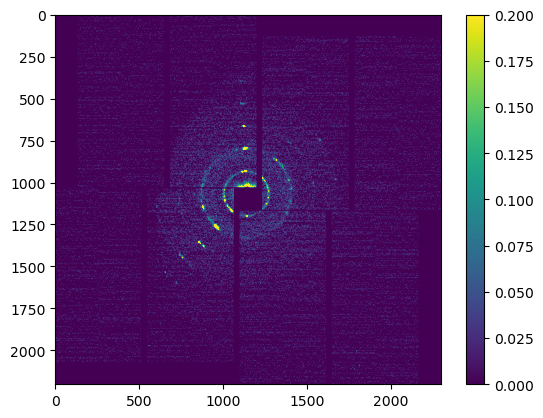

In [23]:
with h5py.File(f'{H5_FOLDER}/r22.h5') as f:
    event_inten =f['/event_inten'][:]
    run_mean = f['/run_mean'][:]
    
plt.figure()
plt.plot(event_inten)

plt.figure()
plt.imshow(run_mean, vmin=0, vmax=0.2)
plt.colorbar()

